In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
def euclidean_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2)**2)

def simulting_func(input_size, start, stop):
    #simulate series with noises
    x_series =  np.linspace(start, stop, input_size) + np.random.rand(input_size)/100
    x_series = np.sort(x_serie)
    y_series = np.sin(2 * np.pi * x1_series) + np.random.rand(input_size)
    return [x_series,y_series]
    

In [57]:
# simulating FX series zith x axis mismatch in time
np.random.seed(42)
input_size = 100

x1_series,y1_series = simulting_func(input_size, 0, 2)
x2_series,y2_series = simulting_func(input_size, 0, 2)

x1_pd = pd.Series(x1_series, name="x1")
x2_pd = pd.Series(x2_series, name="x2")

y1_pd = pd.Series(y1_series, name="y1")
y2_pd = pd.Series(y2_series, name="x2")


pd1 = pd.DataFrame({'x': x1_series,'x1': x1_series, 'y1': y1_series})
pd2 = pd.DataFrame({'x': x2_series,'x2': x2_series, 'y2': y2_series})

#print(pd1.head(10))
#print(pd2.head(10))

pd_dtw = pd.merge(pd1, pd2, how="outer",on="x")
pd_dtw = pd_dtw.ffill()
pd_dtw = pd_dtw.bfill()

print(pd_dtw.head(10))

corr1 = np.corrcoef( pd_dtw["y1"], pd_dtw["y2"])
print(f'Correlation before DTW: {corr1[0, 1]:.4f}')


          x        x1        y1        x2        y2
0  0.000314  0.003745  0.665563  0.000314  0.053656
1  0.003745  0.003745  0.665563  0.000314  0.053656
2  0.026566  0.003745  0.665563  0.026566  0.697500
3  0.029709  0.029709  0.269726  0.026566  0.697500
4  0.043548  0.029709  0.269726  0.043548  0.810851
5  0.047724  0.047724  0.457014  0.043548  0.810851
6  0.065692  0.047724  0.457014  0.065692  1.038563
7  0.066593  0.066593  1.304866  0.065692  1.038563
8  0.082368  0.082368  1.101169  0.065692  1.038563
9  0.089884  0.082368  1.101169  0.089884  1.261301
Correlation before DTW: 0.8189


In [78]:
def dtw_distance_constraint(x_ts1 ,y_ts1, x_ts2, y_ts2, slope):
    """
    Compute the Dynamic Time Warping distance between two time series.

        Parameters:
    - ts1 x,y (array-like): First time series.
    - ts2 x,y (array-like): Second time series.
    - slope (float): Slope parameter for the Itakura Parallelogram restriction.

    Léa Note other package : from tslearn.metrics import dtw_path

    """
    n, m = len(y_ts1), len(y_ts2)
    dtw_ix = np.zeros((n , m ))

    for i in range(n ):
        dtw_ix[i, 0] = np.inf
    for j in range(m ):
        dtw_ix[0, j] = np.inf
    dtw_ix[0, 0] = euclidean_distance(x_ts1[0],y_ts1[0],x_ts2[0], y_ts2[0])

    for i in range(1, n):
        for j in range(max(1, int(m / n * (i-1) - slope * (i-1))), min(m, int(m / n * i + i / slope ) + 1)):
            #Itakura Parallelogram constraint
            if (slope * (j - i)) < (m / n) < (1 / slope * (j - i)) :
            #Itakura Parallelogram constraint
                insertion = dtw_ix[i - 1, j]
                deletion = dtw_ix[i, j - 1]
                match = dtw_ix[i - 1, j - 1]
                min_path = min(insertion, deletion, match)
                dtw_ix[i, j] = euclidean_distance(x_ts1[i - 1],y_ts1[i-1],x_ts2[i - 1], y_ts2[j - 1]) + min_path

    return [dtw_ix,dtw_ix[n-1, m-1],alignment_path]

def dtw_distance(x_ts1 ,y_ts1, x_ts2, y_ts2, slope):
    """
    Compute the Dynamic Time Warping distance between two time series.

        Parameters:
    - ts1 x,y (array-like): First time series.
    - ts2 x,y (array-like): Second time series.
    - slope (float): Slope parameter for the Itakura Parallelogram restriction.

    Léa Note other package : from tslearn.metrics import dtw_path

    """
    n, m = len(y_ts1), len(y_ts2)
    dtw_ix = np.zeros((n , m ))

    for i in range(n ):
        dtw_ix[i, 0] = np.inf
    for j in range(m ):
        dtw_ix[0, j] = np.inf
    dtw_ix[0, 0] = euclidean_distance(x_ts1[0],y_ts1[0],x_ts2[0], y_ts2[0])

    for i in range(1, n):
        for j in  range(1, m):
            insertion = dtw_ix[i - 1, j]
            deletion = dtw_ix[i, j - 1]
            match = dtw_ix[i - 1, j - 1]
            min_path = min(insertion, deletion, match)
            cost = euclidean_distance(x_ts1[i - 1],y_ts1[i-1],x_ts2[i - 1], y_ts2[j - 1])
            dtw_ix[i, j] = cost + min_path
    return [dtw_ix,dtw_ix[n-1, m-1]]

distance = dtw_distance(x1_series, y1_series, x2_series, y2_series, 0.10)


[[  0.66396332          inf          inf ...          inf          inf
           inf]
 [         inf   1.32792664   2.28921248 ... 103.76836894 104.46982498
  105.41830535]
 [         inf   1.56946742   2.04050011 ...  79.38308249  79.69951696
   80.39538923]
 ...
 [         inf 140.0138229  109.74242681 ... 139.66029473 140.72490588
  141.34727909]
 [         inf 142.76337565 112.0895033  ... 141.4709597  142.28824577
  143.08165039]
 [         inf 145.20081281 114.05519473 ... 142.76395443 143.76878149
  144.26565157]]


In [30]:
print(distance[1])

0.0


In [32]:
def dtw_alignment_path(dtw_matrix):
    """
    Obtain the alignment path from the Dynamic Time Warping (DTW) matrix.

    Parameters:
    - dtw_matrix (ndarray): DTW matrix.

    Returns:
    - alignment_path (list): List of tuples representing the alignment path.
    """

    n, m = dtw_matrix.shape
    i, j = n - 1, m - 1
    alignment_path = [(i, j)]

    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            # Determine the direction of movement based on the minimum neighbor
            min_neighbor = min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
            if min_neighbor == dtw_matrix[i - 1, j - 1]:
                i -= 1
                j -= 1
            elif min_neighbor == dtw_matrix[i - 1, j]:
                i -= 1
            else:
                j -= 1

        alignment_path.append((i, j))

    # Reverse the alignment path to obtain the correct order
    alignment_path.reverse()

    return alignment_path



In [80]:
print("Dynamic Time Warping distance:", distance[1])

new_wrapped = dtw_alignment_path(distance[0])

print("dist:", new_wrapped)


Dynamic Time Warping distance: 144.2656515670487
dist: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (6, 4), (7, 5), (8, 6), (9, 7), (10, 8), (11, 9), (12, 10), (13, 11), (14, 12), (15, 13), (16, 14), (17, 15), (18, 16), (19, 17), (20, 18), (21, 19), (22, 20), (23, 21), (23, 22), (23, 23), (23, 24), (24, 25), (24, 26), (24, 27), (25, 28), (26, 29), (27, 30), (28, 31), (29, 32), (30, 33), (31, 34), (32, 35), (33, 36), (34, 37), (35, 38), (36, 39), (37, 40), (38, 41), (39, 42), (40, 43), (41, 44), (42, 45), (43, 46), (44, 47), (45, 48), (46, 49), (47, 50), (48, 51), (49, 52), (50, 53), (51, 53), (52, 53), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 9

C:\Users\Léa\AppData\Local\Temp\ipykernel_17308\2723666423.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.053656473862367056' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_y2[i] = y2_series[j]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


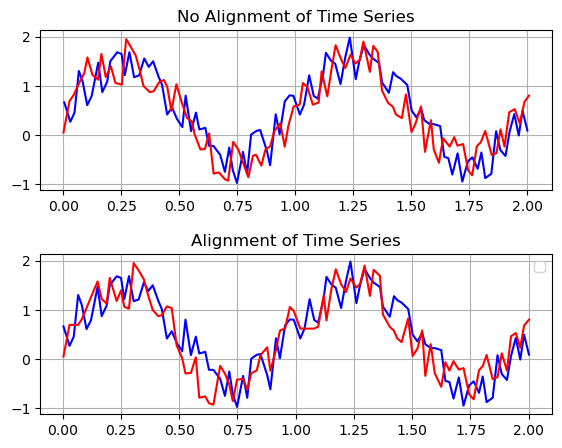

In [65]:

new_y2 = pd.Series(range(input_size))
for i, j in new_wrapped:
   new_y2[i] = y2_series[j]


fig, ax = plt.subplots(2, 1)
ax[0].set_title('No Alignment of Time Series')
ax[0].grid(True)

ax[0].plot(x1_series, y1_series, label='Time Series 1', color='blue')
ax[0].plot(x2_series, y2_series, label='Time Series 2', color='red')
ax[1].plot(x1_series, y1_series, color='blue')
ax[1].plot(x1_series, new_y2, color='red')

ax[1].set_title('Alignment of Time Series')
ax[1].grid(True)

plt.legend()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()


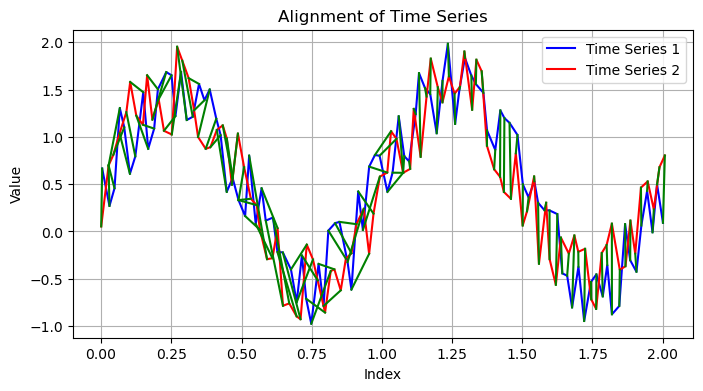

In [46]:
plt.figure(figsize=(8, 4))
plt.plot(x1_series,y1_series , label='Time Series 1', color='blue')
plt.plot(x2_series,y2_series, label='Time Series 2', color='red')

for i, j in new_wrapped:
    plt.plot([x1_series[i], x2_series[j]], [y1_series[i], y2_series[j]], color='green')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Alignment of Time Series')
plt.legend()
plt.grid(True)
plt.show()

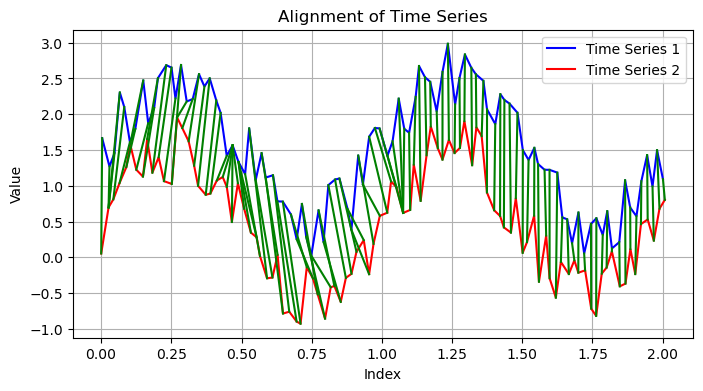

In [67]:
# we shift to better see the alignement

plt.figure(figsize=(8, 4))
plt.plot(x1_series,y1_series+1, label='Time Series 1', color='blue')
plt.plot(x2_series,y2_series, label='Time Series 2', color='red')

for i, j in new_wrapped:
    plt.plot([x1_series[i], x2_series[j]], [y1_series[i]+1, y2_series[j]], color='green')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Alignment of Time Series')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Léa\AppData\Local\Temp\ipykernel_17308\312464001.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.053656473862367056' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_y2_cons[i] = y2_series[j]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


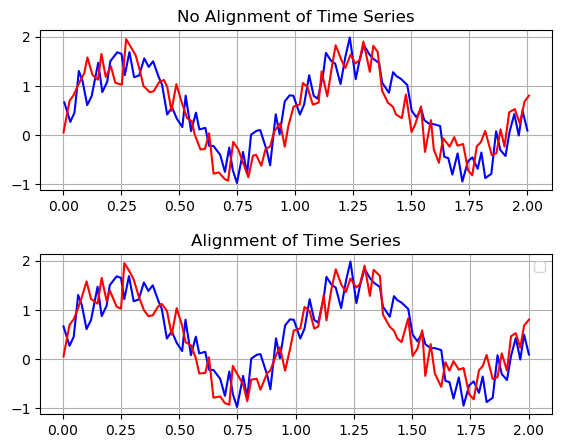

In [74]:
distance_constraint = dtw_distance_constraint(x1_series, y1_series, x2_series, y2_series, 0.10)
new_wrapped_constraint = dtw_alignment_path(distance_constraint[0])


new_y2_cons = pd.Series(range(100))
for i, j in new_wrapped_constraint:
   new_y2_cons[i] = y2_series[j]


fig, ax = plt.subplots(2, 1)
ax[0].set_title('No Alignment of Time Series')
ax[0].grid(True)

ax[0].plot(x1_series, y1_series, label='Time Series 1', color='blue')
ax[0].plot(x2_series, y2_series, label='Time Series 2', color='red')
ax[1].plot(x1_series, y1_series, color='blue')
ax[1].plot(x1_series, new_y2_cons, color='red')

ax[1].set_title('Alignment of Time Series')
ax[1].grid(True)

plt.legend()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()


In [ ]:
input_size_rolling = 100

x1_series,y1_series = simulting_func(input_size_rolling, 2, 4)
x2_series,y2_series = simulting_func(input_size_rolling, 2, 4)

In [ ]:
def dtw_distance_window(x_ts1 ,y_ts1, x_ts2, y_ts2, window, dist=euclidean_distance):
    """
    Compute the Dynamic Time Warping distance between two time series.
        Parameters:
    - ts1 x,y (array-like): First time series.
    - ts2 x,y (array-like): Second time series.
    - slope (float): Slope parameter for the Itakura Parallelogram restriction.
    Léa Note other package : from tslearn.metrics import dtw_path
    """
    n, m = len(y_ts1), len(y_ts2)
    dtw_ix = np.zeros((n , m ))

    for i in range(n):
        dtw_ix[i, 0] = np.inf
    for j in range(m ):
        dtw_ix[0, j] = np.inf
    dtw_ix[0, 0] = dist(x_ts1[0],y_ts1[0],x_ts2[0], y_ts2[0])

    for i in range(1, n):
        for j in  range(max(1, i - window), min(len(y_ts2) + 1, i + window)):
            insertion = dtw_ix[i - 1, j]
            deletion = dtw_ix[i, j - 1]
            match = dtw_ix[i - 1, j - 1]
            min_path = min(insertion, deletion, match)
            cost = dist(x_ts1[i - 1],y_ts1[i-1],x_ts2[i - 1], y_ts2[j - 1])
            dtw_ix[i, j] = cost + min_path
    return [dtw_ix,dtw_ix[n-1, m-1]]


def reduce(y_series):
    """Reduce the time series by averaging pairs of points."""
    return [(y_series[i] + y_series[i + 1]) / 2 for i in range(0, len(y_series) - 1, 2)]

def fastdtw(x1_series, x2_series, y1_series, y2_series, window, dist=euclidean_distance):
    """Compute the FastDTW distance between two time series by recurrence """
    if len(y1_series) < window or len(y2_series) < window:
        dtw, distance = dtw_distance_window(x1_series, x2_series, y1_series, y2_series, window=max(len(y1_series), len(y2_series)), dist=dist)
        return dtw
    return fastdtw(reduce(x1_series), reduce(x2_series),reduce(y1_series), reduce(y2_series), window, dist=dist)

def rolling_dtw(ts1, ts2, window_size):
    """
    Compute the rolling DTW distance between two time series over a rolling window.
    """
    for i in range(len(ts1) - window_size + 1):
        window_ts1 = ts1[i:i + window_size]
        window_ts2 = ts2[i:i + window_size]
        #todo lea see forecast
        dtw = fastdtw(window_ts1, window_ts2)

    return rolling_distances
